# Transfer Learning with Fine Tuning:
here we generaly train **most last** convolution base layer and fully connected layer.



In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:12<00:00, 128MB/s]
100% 1.06G/1.06G [00:12<00:00, 91.6MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

In [5]:
conv_base = VGG16(
    weights  = 'imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [7]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [8]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
# generators
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [18]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 113ms/step - accuracy: 0.8559 - loss: 0.3212 - val_accuracy: 0.9288 - val_loss: 0.1780
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 98ms/step - accuracy: 0.9433 - loss: 0.1396 - val_accuracy: 0.9386 - val_loss: 0.1486
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.9627 - loss: 0.0972 - val_accuracy: 0.9530 - val_loss: 0.1234
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.9756 - loss: 0.0683 - val_accuracy: 0.9510 - val_loss: 0.1232
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.9850 - loss: 0.0475 - val_accuracy: 0.9458 - val_loss: 0.1444
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.9911 - loss: 0.0315 - val_accuracy: 0.9556 - val_loss: 0.1267
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.9949 - loss: 0.0207 - val_accuracy: 0.9534 - val_loss: 0.1375
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.9982 - loss: 0.0122 -

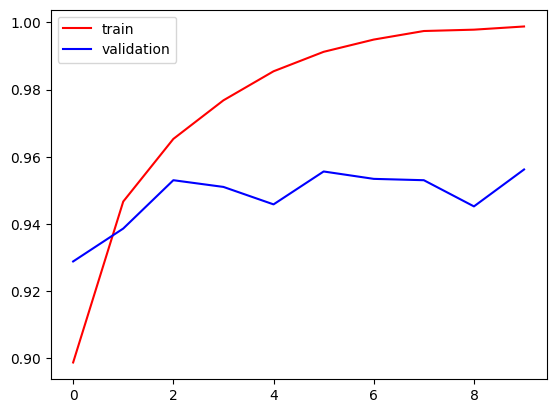

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

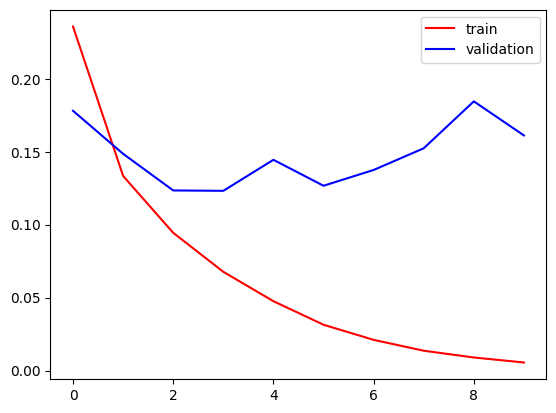

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


# Model Accuracy :  0.9988  
# Validation Accuracy : 0.9562


# Model Prediction

In [21]:
import cv2

In [46]:

def image_preprocess(img_path):
    test_img = cv2.imread(img_path)  # Remove quotes around img_path
    if test_img is None:
        raise ValueError(f"Image at path '{img_path}' not found.")
    test_img = cv2.resize(test_img, (150, 150))
    return test_img


array([[[ 48,  78,  43],
        [ 48,  78,  43],
        [ 49,  80,  43],
        ...,
        [ 19,  29,   6],
        [ 18,  24,   5],
        [ 18,  24,   5]],

       [[ 48,  78,  43],
        [ 48,  78,  43],
        [ 50,  80,  45],
        ...,
        [ 17,  26,   5],
        [ 18,  24,   5],
        [ 17,  23,   4]],

       [[ 48,  78,  43],
        [ 48,  78,  43],
        [ 50,  79,  46],
        ...,
        [ 17,  26,   6],
        [ 18,  24,   5],
        [ 15,  21,   2]],

       ...,

       [[ 48, 138, 103],
        [ 49, 141, 106],
        [ 46, 142, 106],
        ...,
        [ 42, 142, 100],
        [ 42, 142, 100],
        [ 43, 143, 101]],

       [[ 45, 140, 103],
        [ 44, 140, 103],
        [ 43, 142, 102],
        ...,
        [ 39, 143, 102],
        [ 42, 145, 104],
        [ 37, 142,  99]],

       [[ 44, 142,  99],
        [ 41, 143,  99],
        [ 39, 145, 104],
        ...,
        [ 39, 145, 104],
        [ 40, 144, 103],
        [ 38, 145, 102]]], dtype=uint8)
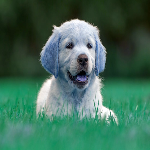

In [61]:
test_input = image_preprocess('/content/dog.jpg')
test_input

In [62]:
reshape_test_input = test_input.reshape((1,150,150,3))

In [53]:
reshape_test_input

array([[[[104, 107, 111],
         [120, 122, 125],
         [133, 134, 138],
         ...,
         [ 41,  44,  48],
         [ 41,  44,  48],
         [ 41,  44,  45]],

        [[104, 105, 109],
         [121, 122, 126],
         [133, 134, 138],
         ...,
         [ 42,  45,  49],
         [ 41,  44,  48],
         [ 41,  44,  47]],

        [[104, 105, 109],
         [121, 122, 126],
         [136, 134, 140],
         ...,
         [ 42,  45,  50],
         [ 41,  44,  48],
         [ 41,  45,  48]],

        ...,

        [[123, 123, 130],
         [118, 117, 124],
         [111, 111, 117],
         ...,
         [ 31,  37,  44],
         [ 31,  34,  42],
         [ 33,  36,  41]],

        [[120, 121, 127],
         [115, 115, 121],
         [109, 109, 115],
         ...,
         [ 31,  37,  44],
         [ 31,  34,  41],
         [ 33,  36,  41]],

        [[118, 121, 125],
         [112, 115, 119],
         [106, 109, 113],
         ...,
         [ 30,  36,  43],
        

In [63]:
predicted_value = model.predict(reshape_test_input)
def final_prediction(predicted_value):
  if predicted_value==1:
    return f'This is Dog'
  else:
    return 'This is Cat'

final_prediction(predicted_value)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


'This is Dog'